## CHEMENG/MECHENG 788 Assginment 1

Yixin (Elliott) Huangfu

**Conclusion is at the bottom of this document.**

In this example, we are trying to predict the value of a potential car sale (i.e. how much a particular person will spend on buying a car) for a customer based on the following attributes:
- Age
- Gender
- Average miles driven per day
- Personal debt
- Monthly income

Divid the data  to the train and test data sets with two different split:
- 80% train and 20% test
- 60% train and 40% test

for each set of train and test :
1. build a FNN model on train data
2. plot the train and validation loss vs. epoch
3. find the mean square error as the score of the model prediction for both train and test data set.

Write your conclusion for the score of the prediction for train and test.

Start Date: Jan 18, 2020 11:02 PM

Due Date: Feb 2, 2020 11:30 PM

## Import and Examine Data

In [26]:
import pandas as pd
names = ['age','gender','miles','debt','salary','budget']
cars = pd.read_csv('cars.csv', names=names)
cars.head()

,age,gender,miles,debt,salary,budget
0,28,0,23,0,4099,620
1,26,0,27,0,2677,1792
2,30,1,58,41576,6215,27754
3,26,1,25,43172,7626,28256
4,20,1,17,6979,8071,4438


Histograms for each feature


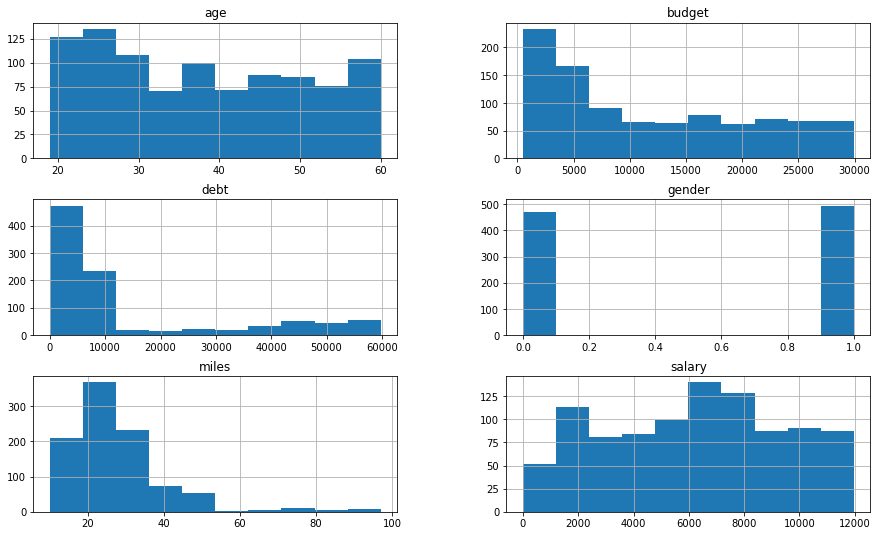

In [286]:
cars.hist(figsize=(15,9))
print('Histograms for each feature')

### Preprocessing (80% training size)

In [200]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def preprocess(data, train_size=0.6):
    '''Preprocess the cars data.'''
    X = data.drop('budget',axis=1)
    y = data['budget']

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size)
    print("Size of train set:{}, test set:{}".format(X_train.shape[0], X_test.shape[0]))

    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    return X_train, X_test, y_train, y_test

In [440]:
X_train, X_test, y_train, y_test = preprocess(cars, train_size=0.8)

Size of train set:770, test set:193


### FNN model

In [202]:
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

Final training loss: 4.93e+06


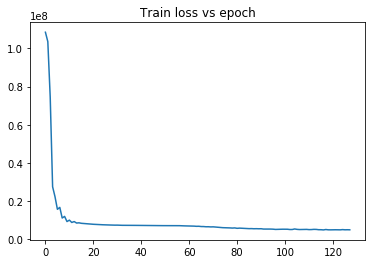

In [445]:
mlp = MLPRegressor(hidden_layer_sizes=(20,30,20),max_iter=500,
                   learning_rate='adaptive', learning_rate_init=0.1)

mlp.fit(X_train,y_train)

# plot loss curve
plt.plot(mlp.loss_curve_)
plt.title('Train loss vs epoch')
print('Final training loss: {:.2e}'.format(mlp.loss_))

## Evaluation

In [109]:
from sklearn.metrics import mean_squared_error, max_error, explained_variance_score

In [198]:
# Examine one prediction
idx = 1
sample = X_test[idx:idx+1]
sample_y = y_test[idx:idx+1].values[0]
pred = mlp.predict(sample)[0]
SE = (pred - sample_y) ** 2
print('Test sample #{}:'.format(idx,))
print('  Truth:{} - Prediction:{:.2f} - Squared_Error:{:,.2f}'.format(sample_y,pred,SE))

Test sample #1:
  Truth:2531 - Prediction:3596.16 - Squared_Error:1,134,561.31


In [446]:
# Evaluation across dataset
pred_train = mlp.predict(X_train)
pred_test = mlp.predict(X_test)
print('MSE of train data: {:,.0f}'.format(mean_squared_error(y_train.values,pred_train)))
print('MSE of test data:  {:,.0f}'.format(mean_squared_error(y_test.values,pred_test)))

MSE of train data: 9,957,425
MSE of test data:  9,281,406


## Result with 60% Training Size

Size of train set:577, test set:386
Final training loss: 4.73e+06
MSE of train data: 9,385,106
MSE of test data:  14,240,192


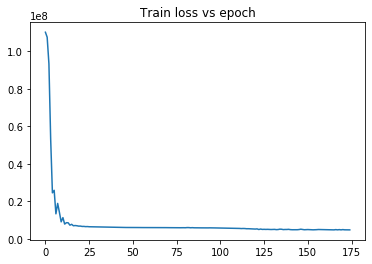

In [375]:
## Code copied from above
# Preprocessing
X_train, X_test, y_train, y_test = preprocess(cars, train_size=0.6)

# Training
mlp = MLPRegressor(hidden_layer_sizes=(20,30,20),max_iter=500,
                   learning_rate='adaptive', learning_rate_init=0.1)

mlp.fit(X_train,y_train)

# plot loss curve
plt.plot(mlp.loss_curve_)
plt.title('Train loss vs epoch')
print('Final training loss: {:.2e}'.format(mlp.loss_))

# Evaluation across dataset
pred_test = mlp.predict(X_test)
pred_train = mlp.predict(X_train)
print('MSE of train data: {:,.0f}'.format(mean_squared_error(y_train.values,pred_train)))
print('MSE of test data:  {:,.0f}'.format(mean_squared_error(y_test.values,pred_test)))

## Conclusion

With a fully connected neural network, hidden layer = (20,30,20), each training produces different MSE result. In general they lie within a certain range. The variation in the MSE value may come from random sampling during train-test split and random initialization of the training. Concretely,

With 80% training size:
- The MSE on train set is between $0.9 - 1.4 \times 10^6$.
- The MSE on test set is between $0.9 - 1.4 \times 10^6$, generally larger than MSE of training set.

With 60% training size:
- The MSE on train set is between $0.8 - 1.4 \times 10^6$.
- The MSE on test set is between $1.0 - 1.5 \times 10^6$, generally larger than MSE of training set.

Based on the observation of muliple training, more training data does not necessarily improve prerformance, but it reduces the variation of MSE produced by each individual training. The difference between train set MSE and test set MSE is also lower with 80% training separation.